In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [2]:
from neural_network import NeuralNetwork

In [3]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Loads the mnist training dataset
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Prepare the data set
for digit in training_data_list:
    all_values = digit.split(',')
    # Scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # Create the target output values
    targets = numpy.zeros(output_nodes) + 0.01
    # Target label at all_values[0]
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)


In [4]:
# Test the neural network
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

7


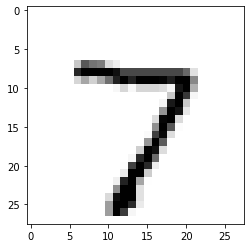

2


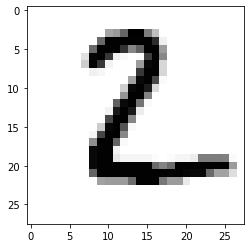

1


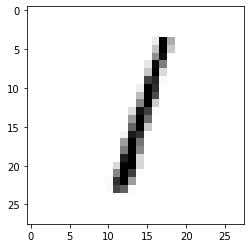

0


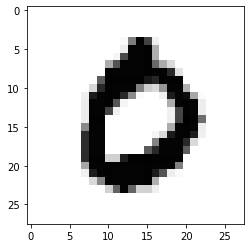

4


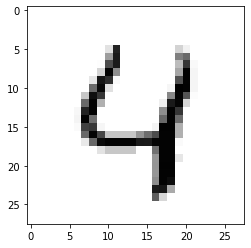

In [5]:
for n in range(5):
    all_values = test_data_list[n].split(',')
    print(all_values[0])
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()